<a href="https://colab.research.google.com/github/Regis0323/Module_2/blob/main/Rurangwa_Assignment_Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background-color: #004B87; padding: 20px; text-align: center; border-radius: 10px; color: white; font-family: Arial, sans-serif; margin: auto; width: 80%;">
    <h1>IABE Data Science Certificate Module 2 Assignment</h1>
    <h2>RURANGWA IRADUKUNDA Jean-François Régis</h2>
    <h3>May 12, 2025</h3>
    <p>Email : jeanfrancoisregis.rurangwairadukunda@axa.be</p>
</div>


## Table of contents
1. [Introduction](#Introduction)<br />
2. [Data Exploration and Preprocessing](#Data_treatment)<br />
3. [Linear Models and Conditional Expectation Estimation](#Linear_Models)<br />
4. [Model testing and comparison](#Testing)<br />
  4.1. [Generalized Linear Models (GLM)](#GLM)<br />
  4.2. [Regularization: Ridge, Lasso, ElasticNet](#Regularization)<br />
  4.3. [Support Vector Machines](#SVM)<br />
5. [Clustering Methods](#Clustering)<br />
6. [Conclusion](#Conclusion)<br />


# 1. Introduction<a name="Introduction"></a>


Under the 'Actuarial Data Scientist' program given by the Belgian association of actuaries (IABE), an assignment was given to us after the first (out of three) module to help us review all the concepts via a practical case.
<br/>
The assignment consists in analysing the "**Auto Insurance Claims Data**" dataset (retrieved on Kaggle) using the concepts learned in the module. This dataset contains different features related to auto insurance claims and tells if a claim was fraudulent or not.
<br/>
We shall now start the process which will lead us to determining the best predictive model that predicts if an insurance claim is fraudulent or not, starting by the data importation and processing, followed by the implementation of different models and ending up with a comparison of the different models before choosing the best one.

#2. Data Exploration and Preprocessing<a name="Data_treatment"></a>

We start by importing different packages that will be of use throughout the analysis.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import MaxNLocator
import plotly.graph_objs as go
import plotly
import time
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.decomposition import PCA
from sklearn.svm import SVC
!git clone https://github.com/Regis0323/Import_files.git
!pip install scikit-fuzzy

# KMeans
from scipy.spatial.distance import euclidean
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# MiniBatchKMeans
from sklearn.cluster import MiniBatchKMeans

# Fuzzy clustering
import skfuzzy as fuzz

# Spectral Clustering
from sklearn.cluster import SpectralClustering

fatal: destination path 'Import_files' already exists and is not an empty directory.


Then we can proceed importing the dataset and having a small look of the data alongside the different types of the variables.

In [ ]:
claims_data = pd.read_csv("/content/Import_files/insurance_claims.csv")
display(claims_data.head())
print(claims_data.dtypes.value_counts())

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


object     21
int64      17
float64     2
Name: count, dtype: int64


Our dataset is composed of 40 columns, of which 21 are categorized as 'object', 17 as 64-bit 'integer' (int64) and 2 as 64-bit 'floating-point' numbers.
<br>
After a quick look of the 5 first rows, we can already see that some lines contain missing values ('?' and 'NaN'). We shall now do a thorough test to identify those missing values and treat them accordingly.

In [ ]:
claims_data.info()
claims_data['authorities_contacted'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

,count
authorities_contacted,
Police,292
Fire,223
Other,198
Ambulance,196


After this first check, we can see that the last column '_c39' is empty and can be deleted. Furthermore, it is shown that the variable 'authorities_contracted' has 91 missing values, but, after a closer look into the variable, those 91 values refer to the cases where **NO** authorities were called/contacted. This misunderstanding came from the fact that there were referred to as 'None' so we shall replace that and put 'Zero' instead.

In [ ]:
claims_data.fillna(value='Zero', inplace=True)
claims_data['authorities_contacted'].value_counts()

,count
authorities_contacted,
Police,292
Fire,223
Other,198
Ambulance,196
Zero,91


As for the variables with '?' in their values, we shall identify them and replace them with the mode or the mean of the specified variable so that we won't encounter any 'missing values' problem, found when using some packages, while doing our study.

In [ ]:
lookup_value = '?'
output = claims_data.isin([lookup_value])
values=claims_data.loc[:,output.any(axis=0)]
print(values)

      collision_type property_damage police_report_available
0     Side Collision             YES                     YES
1                  ?               ?                       ?
2     Rear Collision              NO                      NO
3    Front Collision               ?                      NO
4                  ?              NO                      NO
..               ...             ...                     ...
995  Front Collision             YES                       ?
996   Rear Collision             YES                       ?
997   Side Collision               ?                     YES
998   Rear Collision               ?                     YES
999                ?               ?                       ?

[1000 rows x 3 columns]


Three variables are identified in this case: 'collision_type', 'property_damage' and 'police_report_available.

In [ ]:
#Before the replacement
print(claims_data['collision_type'].value_counts())
print(claims_data['property_damage'].value_counts())
print(claims_data['police_report_available'].value_counts())

collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: count, dtype: int64
property_damage
?      360
NO     338
YES    302
Name: count, dtype: int64
police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64


It is best to replace the values found in the 'collision_type' variable with its mode (='Rear Collision') and the value 'NO' for the two remaining variables as its their second most frequent value after '?' which is the mode for both of them.

In [ ]:
#After the replacement
claims_data['collision_type'].replace(['?'], claims_data['collision_type'].mode([0]), inplace=True)
claims_data['property_damage'].replace(['?'], ['NO'], inplace=True)
claims_data['police_report_available'].replace(['?'], ['NO'], inplace=True)
print(claims_data['collision_type'].value_counts())
print(claims_data['property_damage'].value_counts())
print(claims_data['police_report_available'].value_counts())

collision_type
Rear Collision     470
Side Collision     276
Front Collision    254
Name: count, dtype: int64
property_damage
NO     698
YES    302
Name: count, dtype: int64
police_report_available
NO     686
YES    314
Name: count, dtype: int64


Having dealt with the missing values, we can now look deeper into variables/columns and see if there aren't any that can removed.

Text(0.5, 1.0, 'Correlation Matrix of Features')

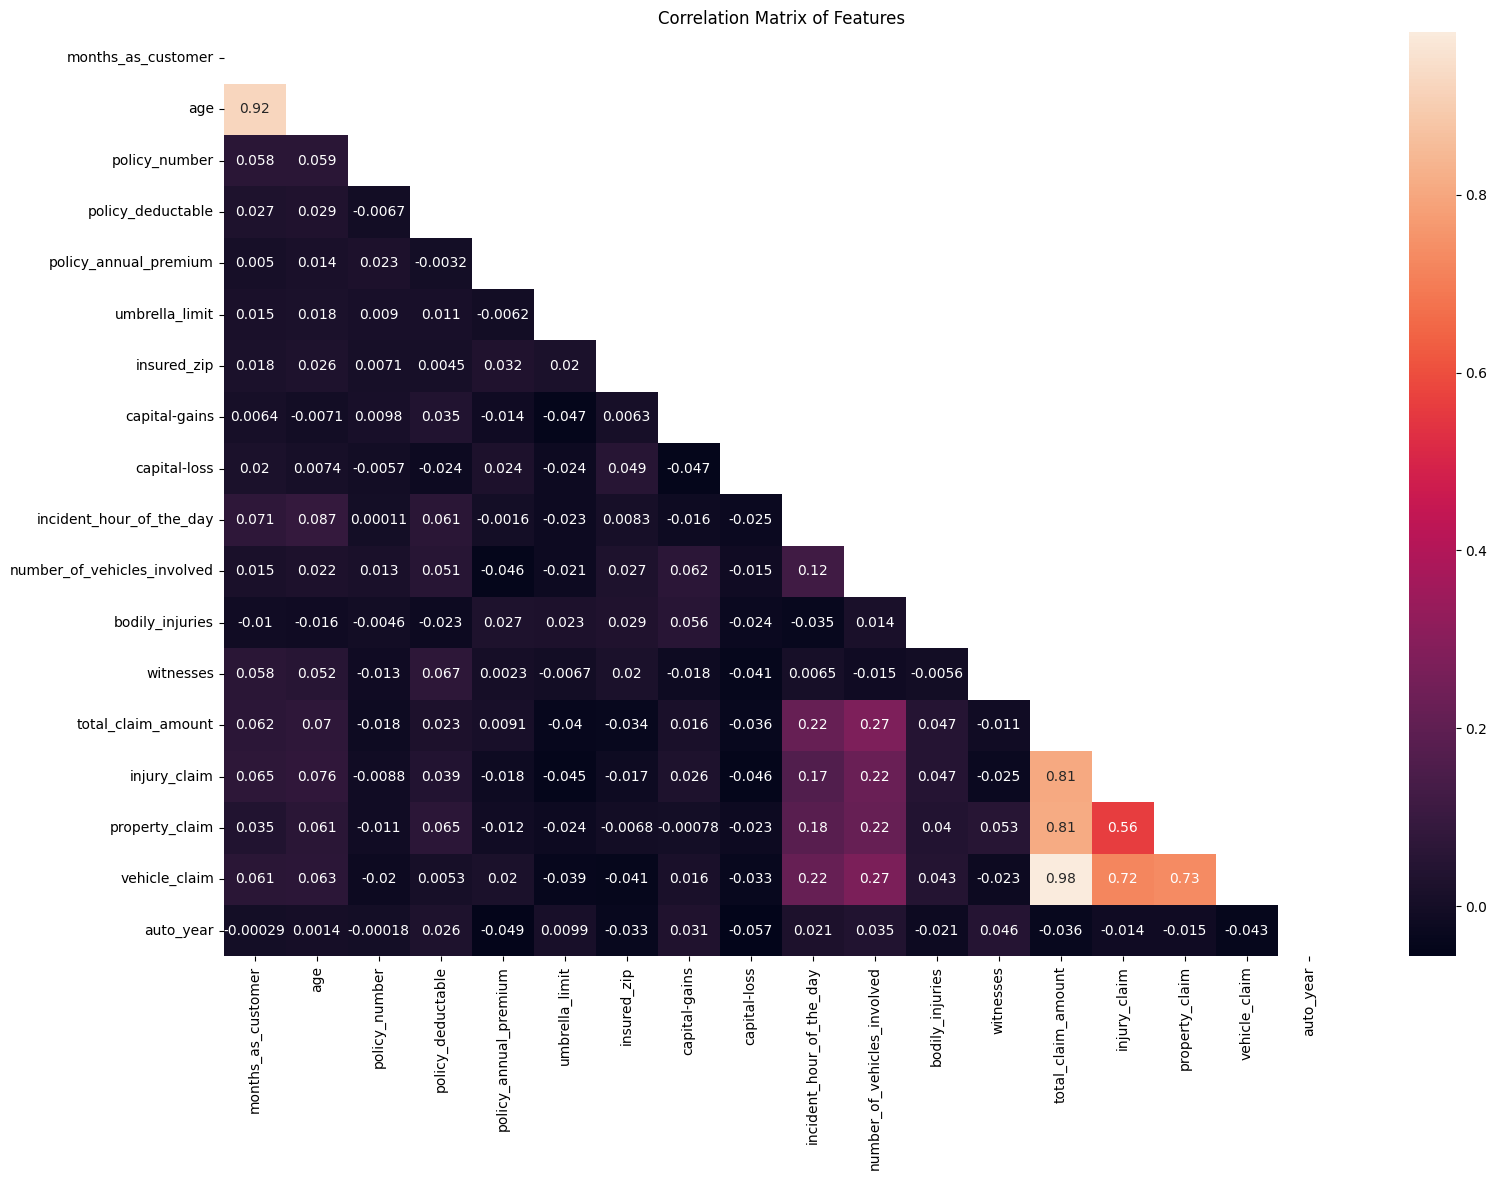

In [ ]:
Correlation_Matrix = claims_data.corr(numeric_only=True)
plt.figure(figsize = (18, 12))
mask = np.triu(np.ones_like(Correlation_Matrix, dtype=bool))
sns.heatmap(Correlation_Matrix,mask=mask, annot = True)
plt.title('Correlation Matrix of Features')

Following the correlation matrix, we can remove the 'age' variable and the 'total_claim_amount' variable which is the sum of 'injury_claim', 'property_claim' and 'vehicle_claim' hence the high correlation. But the latter will stay because it will be useful in one of the processes.
<br>
Another way of removing unnecessary variables is to look for unique values/categories in each variable and the higher that number is the less useful that variable will be for the prediction.

In [ ]:
claims_data.nunique()

,0
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


After all these analyses, we decide to remove all the variables found below given that they are not necessary for the prediction for various reasons (zero values, high correlation, etc.) and showcase the summary/info about the remaining ones.

In [ ]:
clean_data = claims_data.drop(['_c39', 'age','policy_number','policy_bind_date','policy_state','insured_hobbies','auto_year','auto_make','auto_model','incident_location',
           'incident_state','incident_city','incident_date','insured_zip'],axis=1)
display(clean_data.head())
print(clean_data.info())

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,1,NO,0,1,NO,6500,1300,650,4550,N


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

Now, with this 'clean' dataset we can focus on identifying and tranforming categorical variables to numeric ones so as to pass them easily into different processes.

In [ ]:
# Treating the categorical variables
categorical_variables=clean_data.select_dtypes(include = ['object'])
for col in categorical_variables.columns:
   print(f"{col}: \n{categorical_variables[col].unique()}\n")
new_categorical_variables = pd.get_dummies(categorical_variables, drop_first = True)
new_categorical_variables = new_categorical_variables.astype(int)

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'Zero' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']

fraud_reported: 
['Y' 'N']



After the categorical variables we can now isolate the numerical variables and treat them by first standardizing them and then by removing any potential outliers.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 55 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      1000 non-null   float64
 1   policy_deductable                       1000 non-null   float64
 2   umbrella_limit                          1000 non-null   float64
 3   capital-gains                           1000 non-null   float64
 4   capital-loss                            1000 non-null   float64
 5   incident_hour_of_the_day                1000 non-null   float64
 6   number_of_vehicles_involved             1000 non-null   float64
 7   bodily_injuries                         1000 non-null   float64
 8   witnesses                               1000 non-null   float64
 9   total_claim_amount                      1000 non-null   float64
 10  injury_claim                            1000 non-null   float

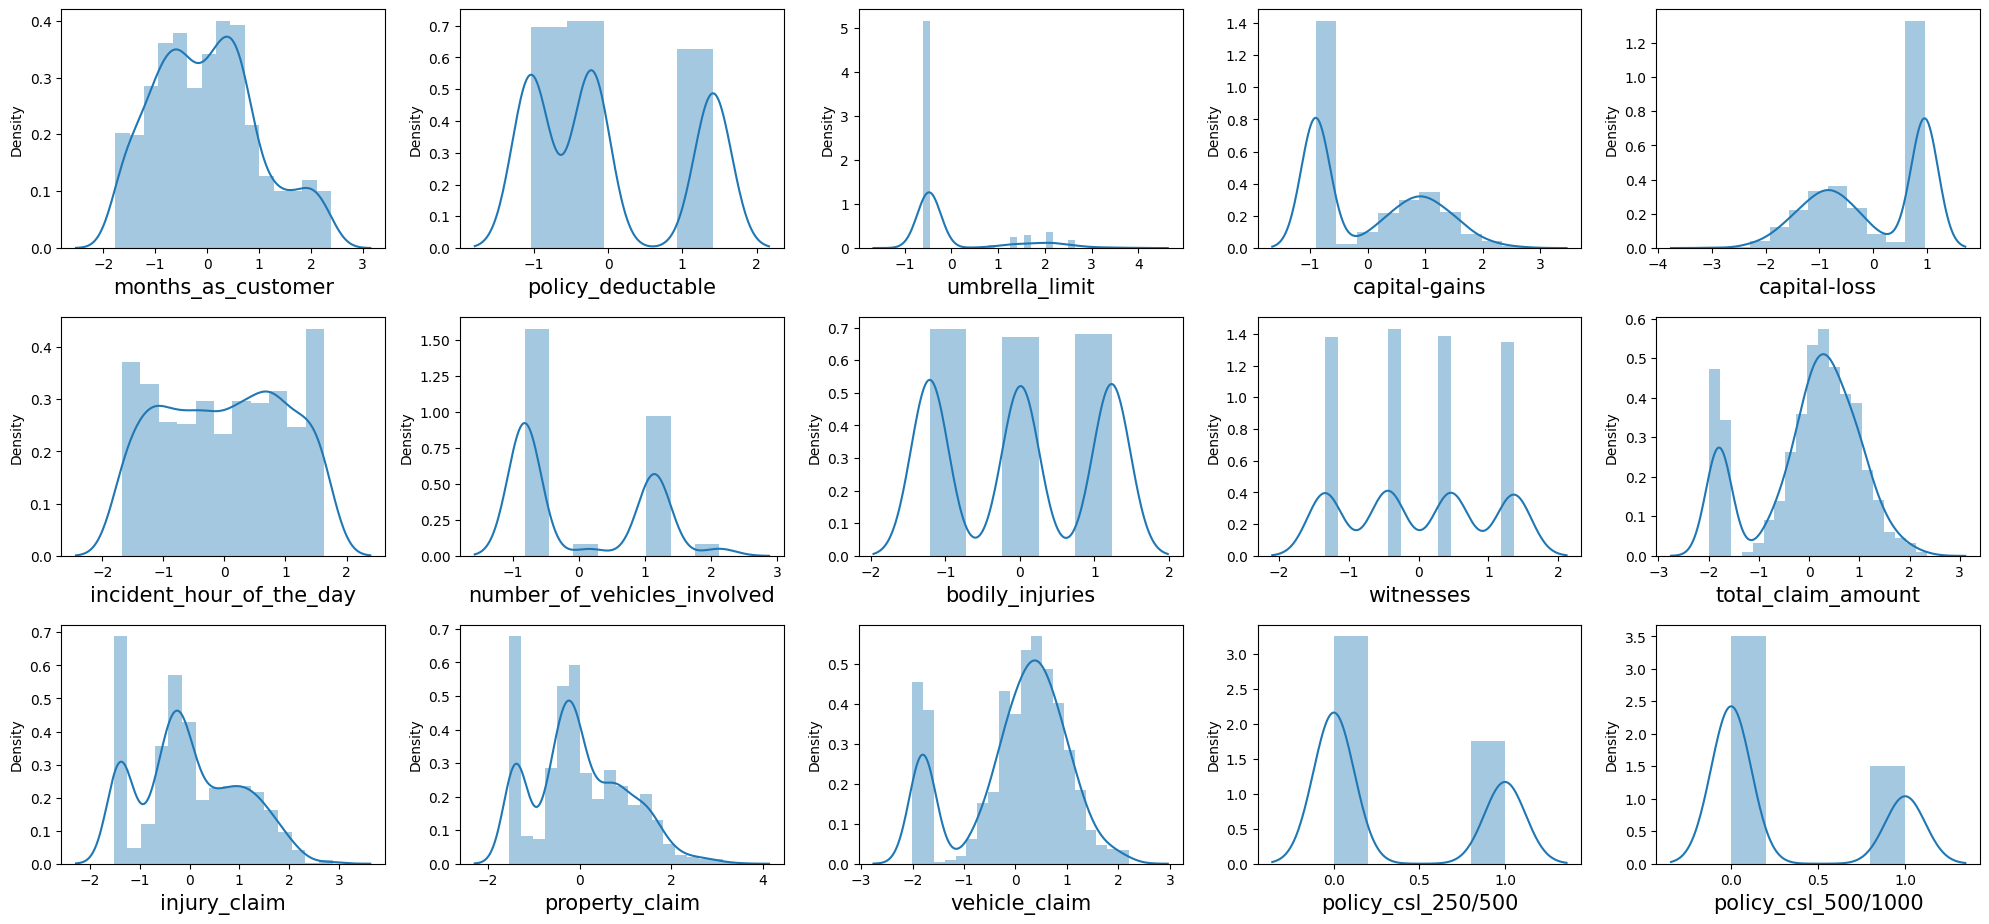

In [ ]:
# Getting the numerical variables as well
numerical_variables = clean_data.select_dtypes(include = ['int64'])

# Scaling the numerical variables by standardization
scaler = StandardScaler()
std_data = scaler.fit_transform(numerical_variables)
std_numerical_variables = pd.DataFrame(data = std_data, columns = numerical_variables.columns, index = numerical_variables.index)

# Putting together the new categorical values and the standardized numerical values
new_clean_data=pd.concat([std_numerical_variables, new_categorical_variables], axis = 1)
new_clean_data.info()

# A plot showing the 15 first variables
plt.figure(figsize = (20, 15))
pltnbr = 1
for col in new_clean_data.columns:
    if pltnbr <= 15:
        ax = plt.subplot(5, 5, pltnbr)
        sns.distplot(new_clean_data[col])
        plt.xlabel(col, fontsize = 15)
    pltnbr += 1
plt.tight_layout()
plt.show()

Having done necessary treatments to the categorical and numerical variables, we concatenate/put them together in a new dataset: new_clean_data.
<br>
We can now check for the potential outliers using the Inter-quantile method and remove them from our dataset. However, we shall not take into account the 'umbrella_limit' which presents special values and may influence the results in a bad way.

Original dataset shape: (1000, 55)
Cleaned dataset shape: (993, 55)


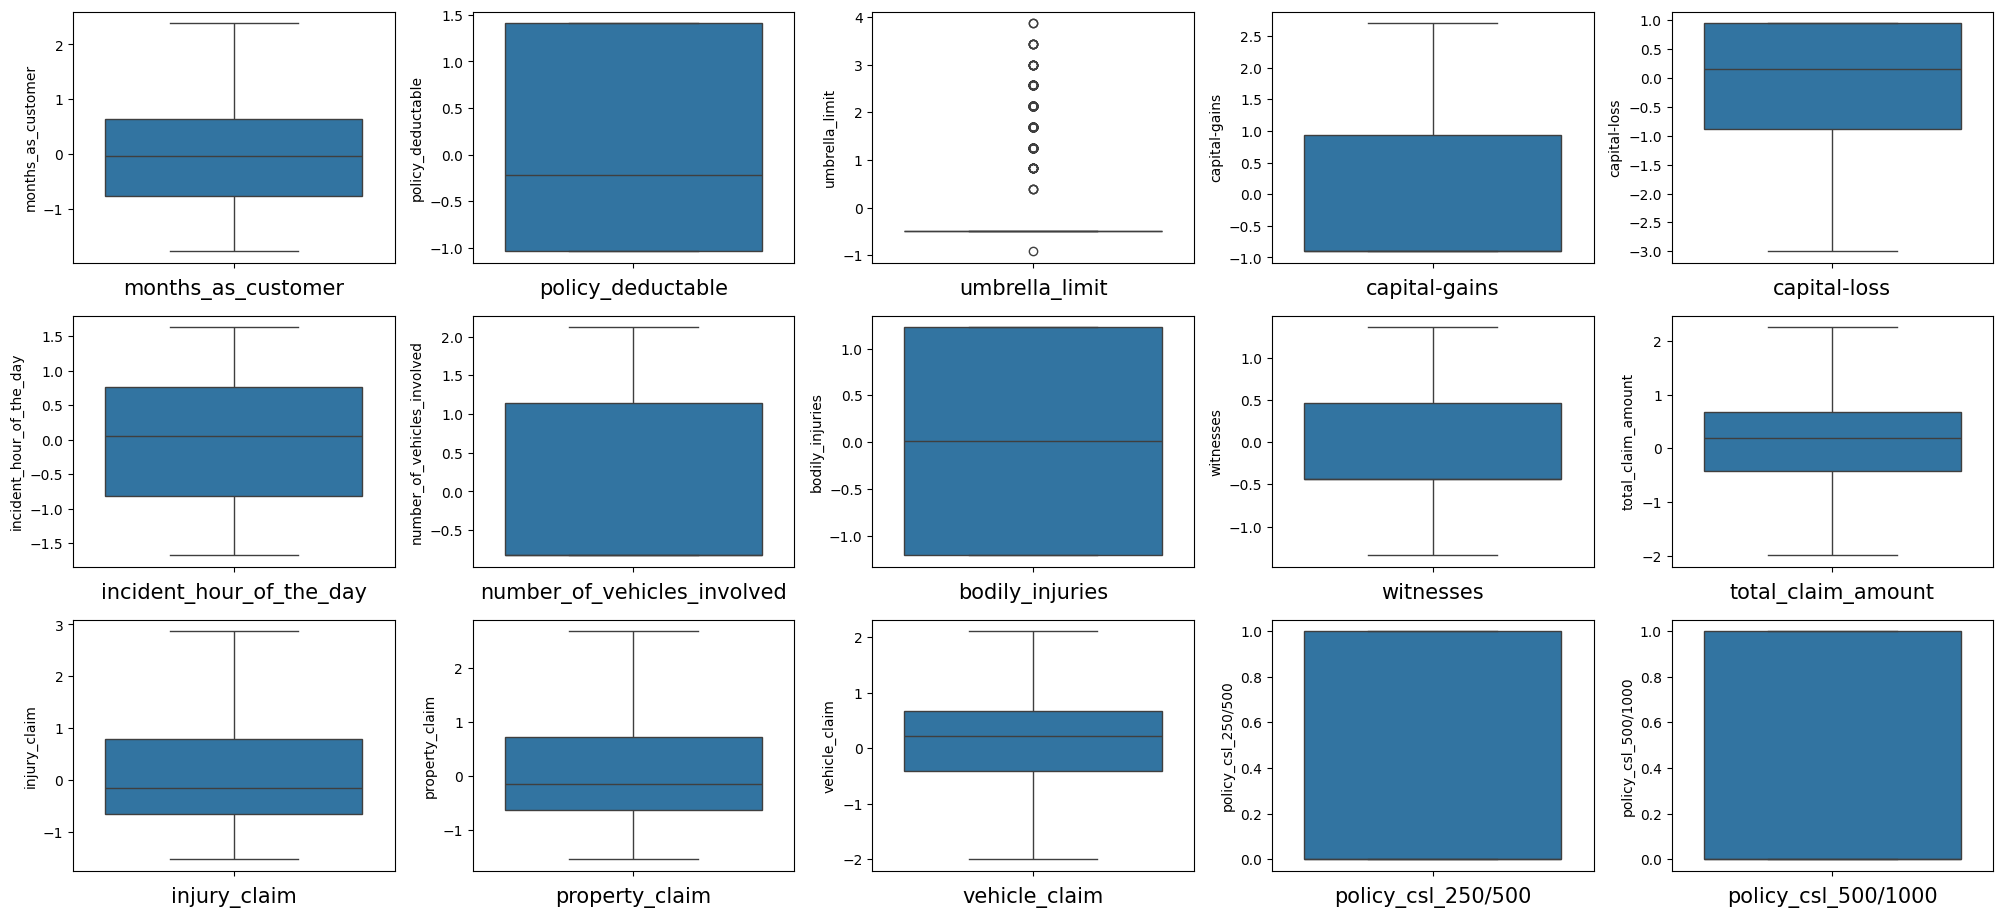

In [ ]:
numerical_columns = std_numerical_variables[['months_as_customer', 'policy_deductable',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim']]

# Creation of a boolean mask used for filtering and starts with all True
mask = pd.Series([True] * len(new_clean_data))

for col in numerical_columns:
    Q1 = new_clean_data[col].quantile(0.25)
    Q3 = new_clean_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mask &= (new_clean_data[col] >= lower_bound) & (new_clean_data[col] <= upper_bound) # Update of the mask to include only non-outlier rows for the current column

# Filter the DataFrame using the combined mask
Final_claims_data = new_clean_data[mask]

# Check the result
print("Original dataset shape:", new_clean_data.shape)
print("Cleaned dataset shape:", Final_claims_data.shape)
plt.figure(figsize = (20, 15))
pltnbr = 1
for col in Final_claims_data.columns:
    if pltnbr <= 15:
        ax = plt.subplot(5, 5, pltnbr)
        sns.boxplot(Final_claims_data[col])
        plt.xlabel(col, fontsize = 15)
    pltnbr += 1
plt.tight_layout()
plt.show()

We now have a dataset '**Final_claims_data**' of 993 lines and 55 columns which is treated to the max (treatment of categorical variables along with the standardization and the retrievement of potential outliers of the numerical variables), clean and is ready to be used in different models.

# 3. Linear Models and Conditional Expectation Estimation<a name="Linear_Models"></a>

In this section we shall use the Linear Regression method to predict the claim amount ('total_claim_amount'), after splitting the dataset ('Final_claims_data') into training and testing sets, and finish by evaluating the model using the R-squared value to measure how well the model explains the variance in the target variable.


In [ ]:
# Split the dataset into features and target variable
X = Final_claims_data.drop(['total_claim_amount','injury_claim','property_claim','vehicle_claim'], axis=1)
x = sm.add_constant(X)
y = Final_claims_data['total_claim_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     47.54
Date:                Fri, 31 Jan 2025   Prob (F-statistic):          2.42e-223
Time:                        13:50:38   Log-Likelihood:                -770.73
No. Observations:                 993   AIC:                             1645.
Df Residuals:                     941   BIC:                             1900.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.2803      0.139      2.021      0.044       0.008       0.552
months_as_customer                         0.0221      0.018      1.258      0.209      -0.012       0.057
policy_deductable                          0.0229      0.018      1.295      0.196      -0.012       0.058
umbrella_limit                            -0.0024      0.018     -0.135      0.892      -0.037       0.032
capital-gains                             -0.0167      0.018     -0.946      0.345      -0.051       0.018
capital-loss                              -0.0157      0.018     -0.889      0.374      -0.050       0.019
incident_hour_of_the_day                   0.0045      0.018      0.245      0.806      -0.031       0.040
number_of_vehicles_involved               -0.0196      0.073     -0.269      0.788      -0.163       0.123
bodily_injuries                            0.0359      0.018      2.050      0.041       0.002       0.070
witnesses                                 -0.0102      0.018     -0.579      0.563      -0.045       0.024
policy_csl_250/500                        -0.0249      0.042     -0.591      0.555      -0.107       0.058
policy_csl_500/1000                       -0.0060      0.044     -0.137      0.891      -0.093       0.081
insured_sex_MALE                          -0.0258      0.035     -0.737      0.461      -0.095       0.043
insured_education_level_College           -0.0915      0.069     -1.320      0.187      -0.228       0.045
insured_education_level_High School        0.0729      0.064      1.134      0.257      -0.053       0.199
insured_education_level_JD                -0.0253      0.064     -0.392      0.695      -0.152       0.101
insured_education_level_MD                 0.0509      0.066      0.777      0.438      -0.078       0.180
insured_education_level_Masters            0.0845      0.066      1.283      0.200      -0.045       0.214
insured_education_level_PhD                0.0607      0.068      0.889      0.374      -0.073       0.195
insured_occupation_armed-forces            0.0315      0.095      0.330      0.741      -0.156       0.219
insured_occupation_craft-repair            0.0322      0.094      0.342      0.733      -0.153       0.217
insured_occupation_exec-managerial         0.0676      0.094      0.722      0.471      -0.116       0.251
insured_occupation_farming-fishing        -0.1346      0.102     -1.314      0.189      -0.336       0.066
insured_occupation_handlers-cleaners       0.1011      0.102      0.986      0.324      -0.100       0.302
insured_occupation_machine-op-inspct      -0.0070      0.089     -0.079      0.937      -0.182       0.167
insured_occupation_other-service           0.0551      0.095      0.582      0.561     

A quick analysis of the results above suggests that we could keep 5 variables: 'bodily_injuries','authorities_contacted_Other','property_damage_YES','incident_type_Parked Car' and 'incident_type_Vehicle Theft', and still have a good prediction as there are the only ones with the 'p-value < 0.05' and so are typically considered statistically significant predictors.

In [ ]:
# New split
X_2 = Final_claims_data[['bodily_injuries','authorities_contacted_Other','property_damage_YES','incident_type_Parked Car','incident_type_Vehicle Theft']]
x_2 = sm.add_constant(X_2)
y_2 = Final_claims_data['total_claim_amount']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.2, random_state=23)

model_2 = sm.OLS(y_2, x_2)
results_2 = model_2.fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     476.7
Date:                Fri, 31 Jan 2025   Prob (F-statistic):          3.03e-260
Time:                        13:56:08   Log-Likelihood:                -793.72
No. Observations:                 993   AIC:                             1599.
Df Residuals:                     987   BIC:                             1629.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.3288      0.025     13.387      0.000       0.281       0.377
bodily_injuries                 0.0378      0.017      2.207      0.028       0.004       0.071
authorities_contacted_Other     0.1038      0.044      2.351      0.019       0.017       0.190
property_damage_YES             0.0824      0.037      2.206      0.028       0.009       0.156
incident_type_Parked Car       -2.1441      0.063    -34.127      0.000      -2.267      -2.021
incident_type_Vehicle Theft    -2.1466      0.060    -35.911      0.000      -2.264      -2.029
==============================================================================
Omnibus:                       14.743   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.038
Skew:                           0.201   Prob(JB):                     0.000121
Kurtosis:                       3.524   Cond. No.                         4.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_LR= LinearRegression().fit(x_2, y_2)
params = np.append(model_LR.intercept_,model_LR.coef_)
print("Parameters of the linear regression:", params[0].round(3), ",", params[2].round(3), "and", params[3].round(3))

model = sm.OLS(y_2, sm.add_constant(x_2)).fit()

aic_value = model.aic
bic_value = model.bic
print("AIC:", round(aic_value, 3))
print("BIC:", round(bic_value, 3))

Parameters of the linear regression: 0.329 , 0.038 and 0.104
AIC: 1599.449
BIC: 1628.853


R2 on the train dataset: 0.7
R2 on the test dataset: 0.736


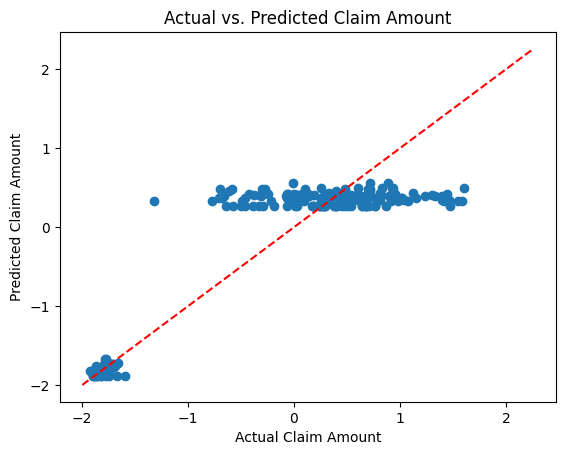

In [ ]:
#X_train = sm.add_constant(X_train)
#X_test = sm.add_constant(X_test)

model_p = sm.OLS(y_train_2, X_train_2).fit()
y_pred_2 = model_p.predict(X_test_2)

R2_train_set_2 = model_p.rsquared
R2_test_set_2 = r2_score(y_test_2, y_pred_2)

# R2 on the train dataset
print("R2 on the train dataset:", round(R2_train_set_2,3))
# R2 on the test dataset
print("R2 on the test dataset:", round(R2_test_set_2, 3))

plt.scatter(y_test_2, y_pred_2)
plt.xlabel('Actual Claim Amount')
plt.ylabel('Predicted Claim Amount')
plt.title('Actual vs. Predicted Claim Amount')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Line of equality
plt.show()

After doing the different test necessary, we have different elements as outputs such as the parameters of the Linear regression model, the AIC and BIC values along with the R-Squared values on the train and test datasets. <br>
With the 'test' dataset's R-Squared value greater than the 'train' dataset's one, it suggests that the model generalizes well to unseen data and performs slightly better on the test set alongside the fact that there is no overfitting of the model, so it is good on this point.

# 4. Model testing and comparison<a name="Testing"></a>

In this section we shall use the same 'Final_claims_data' dataset, excluding the variable 'total_claim_amount', to classify the claims as fradulent ('fraud_reported_Y') or not with the help of various regression models that will be developed further below in the sub-sections.

## 4.1. Generalized Linear Models<a name="GLM"></a>

We start with the Generalized linear models. The methodology consists in dividing the dataset in 2 sets(1 training set and 1 testing set), then we'll fit a logistic regression model to the training data and predict the probabilities of fraudulent claims on the test set before converting these probabilities into binary classifications using a threshol and evaluating the model's performance with classification metrics.

In [ ]:
# Split the dataset into features and target variable
X = Final_claims_data.drop(['total_claim_amount','fraud_reported_Y'], axis=1)
x = sm.add_constant(X)
y = Final_claims_data['fraud_reported_Y']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

# Fit the GLM model
glm_model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
glm_results = glm_model.fit()

# Probabilities predictionsth
y_pred_prob = glm_results.predict(X_test)

# Convert probabilities to binary predictions (threshold can be adjusted)
threshold = 0.48
y_pred = (y_pred_prob >= threshold).astype(int)

In [ ]:
## Different classification metrics

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy,4)}')


Confusion Matrix:
[[124  17]
 [ 28  30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       141
           1       0.64      0.52      0.57        58

    accuracy                           0.77       199
   macro avg       0.73      0.70      0.71       199
weighted avg       0.76      0.77      0.77       199

Accuracy: 0.7739


This model demonstrates a solid ability to classify claims as fraudulent or not, with an overall accuracy of 77.39%. With a recall of 88% for Class 0, it performs particularly well in identifying non-fraudulent claims.
<br>
However, while the model shows improved performance in detecting fraudulent claims with a recall of 52%, there is still a significant opportunity for enhancement in this area. The precision for fraudulent claims is also moderate at 64%.
<br>
Overall, the model is a valuable tool for fraud detection but may benefit from further refinement to increase its sensitivity to fraudulent claims while maintaining its effectiveness in identifying legitimate claims.

## 4.2. Regularization: Ridge, Lasso, ElasticNet<a name="Regularization"></a>

Now we shall use the same methodology and variables as above IN section 3 (with reduced/optimal variables) to run tests under the Ridge, Lasso and ElasticNet regression models to predict the claim amount before comparing all the results together.

In [ ]:
# Split the dataset into features and target variable
X_2 = Final_claims_data[['bodily_injuries','authorities_contacted_Other','property_damage_YES','incident_type_Parked Car','incident_type_Vehicle Theft']]
x_2 = sm.add_constant(X_2)
y_2 = Final_claims_data['total_claim_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_2, y_2, test_size=0.2, random_state=23)

# Recall of the linear regression on the full dataset
linear_model = LinearRegression()
model_LR= linear_model.fit(X_train, y_train)
y_pred_linear = model_LR.predict(X_test)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# ElasticNet Regression
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # L1 ratio 0.5 means equal parts Lasso and Ridge
elasticnet_model.fit(X_train, y_train)
y_pred_elasticnet = elasticnet_model.predict(X_test)

# Performance evaluation and model comparison
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression']
predictions = [y_pred_linear, y_pred_ridge, y_pred_lasso, y_pred_elasticnet]

for model, preds in zip(models, predictions):
    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f"{model} - MSE: {mse:.4f}, MAE: {mae:.4f}, R-squared: {r2:.4f}")


Linear Regression - MSE: 0.2515, MAE: 0.3632, R-squared: 0.7357
Ridge Regression - MSE: 0.2514, MAE: 0.3644, R-squared: 0.7357
Lasso Regression - MSE: 0.9515, MAE: 0.7728, R-squared: -0.0000
ElasticNet Regression - MSE: 0.9515, MAE: 0.7728, R-squared: -0.0000


On one side, we observe that performance of Ridge regression is similar to linear regression, meaning that the regularization did not significantly improve the model. On the other side, the poor performance of Lasso and ElasticNet suggests that aggressive regularization may have led to underfitting.

In [ ]:
# Impact of Regularization
print("\nModel Coefficients:")
print("Linear Regression Coefficients:", linear_model.coef_)
print("Ridge Regression Coefficients:", ridge_model.coef_)
print("Lasso Regression Coefficients:", lasso_model.coef_)
print("ElasticNet Regression Coefficients:", elasticnet_model.coef_)


Model Coefficients:
Linear Regression Coefficients: [ 0.03492606  0.0188951  -0.0037001  -0.02663318 -0.02549859  0.00455651
 -0.03646801  0.04865516 -0.01363781 -0.04249516  0.0068666  -0.03536814
 -0.0886783   0.12314123  0.01881566  0.08739506  0.07817879  0.08751039
  0.03504152  0.04217191  0.10164728 -0.16329376  0.11712064  0.04697916
  0.05287375  0.03869984  0.04840236  0.03462854 -0.01026188  0.09122442
  0.05787783  0.02568278  0.07479156  0.01766189  0.09480224  0.14845892
 -2.19415636  0.02860654 -2.19001268 -0.09496418 -0.0400452  -0.04033291
 -0.07683033 -0.01492786 -0.00929052  0.09976713  0.06957029  0.11346304
  0.10678654 -0.00639654  0.04735657]
Ridge Regression Coefficients: [ 0.03433808  0.01877615 -0.00409051 -0.02812939 -0.02432241  0.01042172
  0.12229735  0.05260875 -0.01476223 -0.04428477  0.00360495 -0.04055301
 -0.09267913  0.1228915   0.01803859  0.08557756  0.0684208   0.08543842
  0.04310738  0.03619323  0.10913714 -0.14739575  0.12441546  0.04160702
  

We can conclude saying that regularization techniques such as Ridge Regression reduce overfitting by penalizing large coefficients while retaining all features whereas Lasso Regression enhances model interpretability by forcing some coefficients to zero at the risk of excluding important predictors and the ElasticNet Regression combines the benefits of both approaches to enable coefficient shrinkage and feature selection, especially in datasets with correlated features.<br>
In our case, the Ridge Regression performed in a similar way as the Linear Regression but the Lasso and ElasticNet regressions performed badly due to the underfitting caused by their agressive regularization.

## 4.3. Support Vector Machines<a name="SVM"></a>

In this section we shall train a Support Vector Machine for the classification of fraudulent claims ('fraud_reported_Y') and compare its performance with a Logistic Regression model to help determine which model performs better for our dataset ('Final_claims_data').

In [ ]:
## Split the dataset into features and target variable
X = Final_claims_data.drop(['total_claim_amount','fraud_reported_Y'], axis=1)
x = sm.add_constant(X)
y = Final_claims_data['fraud_reported_Y']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

## Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

## SVM Model
svm_model = SVC()

# Specifying the Hyperparameter Grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Using GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Model fitting
grid_search.fit(X_train, y_train)

# Getting the best parameters and the best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

## Predictions
y_pred_logistic = logistic_model.predict(X_test)
y_pred_svm = best_model.predict(X_test)

## Performance Evaluation
print("Logistic Regression Performance:")
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))
print("Accuracy:", round(accuracy_score(y_test, y_pred_logistic),4))

print("\nSVM Performance:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", round(accuracy_score(y_test, y_pred_svm),4))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Logistic Regression Performance:
[[125  16]
 [ 32  26]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       141
           1       0.62      0.45      0.52        58

    accuracy                           0.76       199
   macro avg       0.71      0.67      0.68       199
weighted avg       0.74      0.76      0.75       199

Accuracy: 0.7588

SVM Performance:
[[115  26]
 [ 17  41]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       141
           1       0.61      0.71      0.66        58

    accuracy                           0.78       199
   macro avg       0.74      0.76      0.75       199
weighted avg       0.80      0.78      0.79       199

Accuracy: 0.7839


After the study, we see that the SVM model demonstrates superior overall performance in classifying fraudulent claims compared to Logistic Regression, particularly in identifying fraudulent cases thanks to its higher accuracy of 78.39%. <br>
However, much effort is put in tuning the SVM parameters to get the best ones that lead to that accuracy which is a considerable inconvenient compared to the Logistic Regression.

# 5. Clustering Methods<a name="Clustering"></a>

In this section we shall use the 'K-means++', an improved version of the standard k-means algorithm as it initializes the cluster centroids in a way that spreads them out leading to better clustering results and faster convergence, to the dataset to group the claims based on their features before analysing the clusters and providing insights about the characteristics of each cluster.

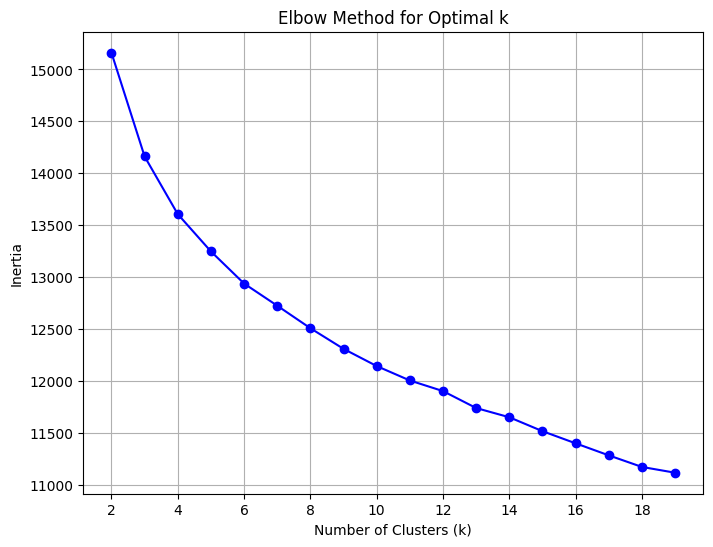

In [ ]:
# 2. Perform K-means for a range of cluster k and save the attribute ineria
inertia = []
k_range = range(2, 20)  # Testing k values from 1 to 10

for k in k_range:
    km = KMeans(init="random", n_clusters=k, n_init=20, max_iter = 300)
    km.fit(X)
    inertia.append(km.inertia_)

# 3. Plot the Inertia vs. Number of Clusters (Elbow Method)
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
# Set the x-axis to show only integer values
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

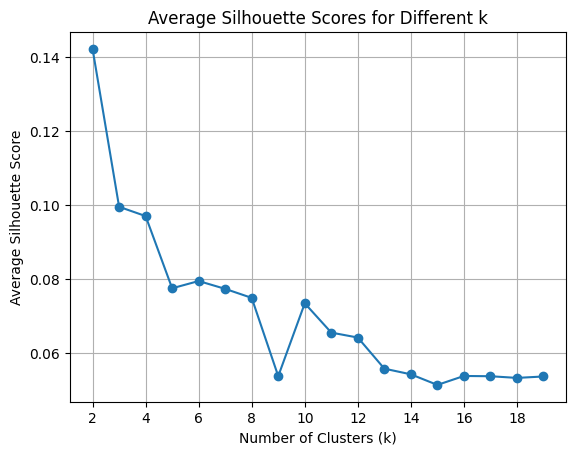

In [ ]:
# Range of k values to test
k_range = range(2, 20)
silhouette_scores = []

# Loop over different values of k
for k in k_range:
    # Apply KMeans clustering
    kmeans = KMeans(init="random", n_clusters=k, n_init=20, max_iter = 300)
    kmeans.fit(X)

    # Calculate the silhouette score for the current clustering
    avg_score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(avg_score)

# Plot the silhouette scores for different k values
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Average Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
# Set the x-axis to show only integer values
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

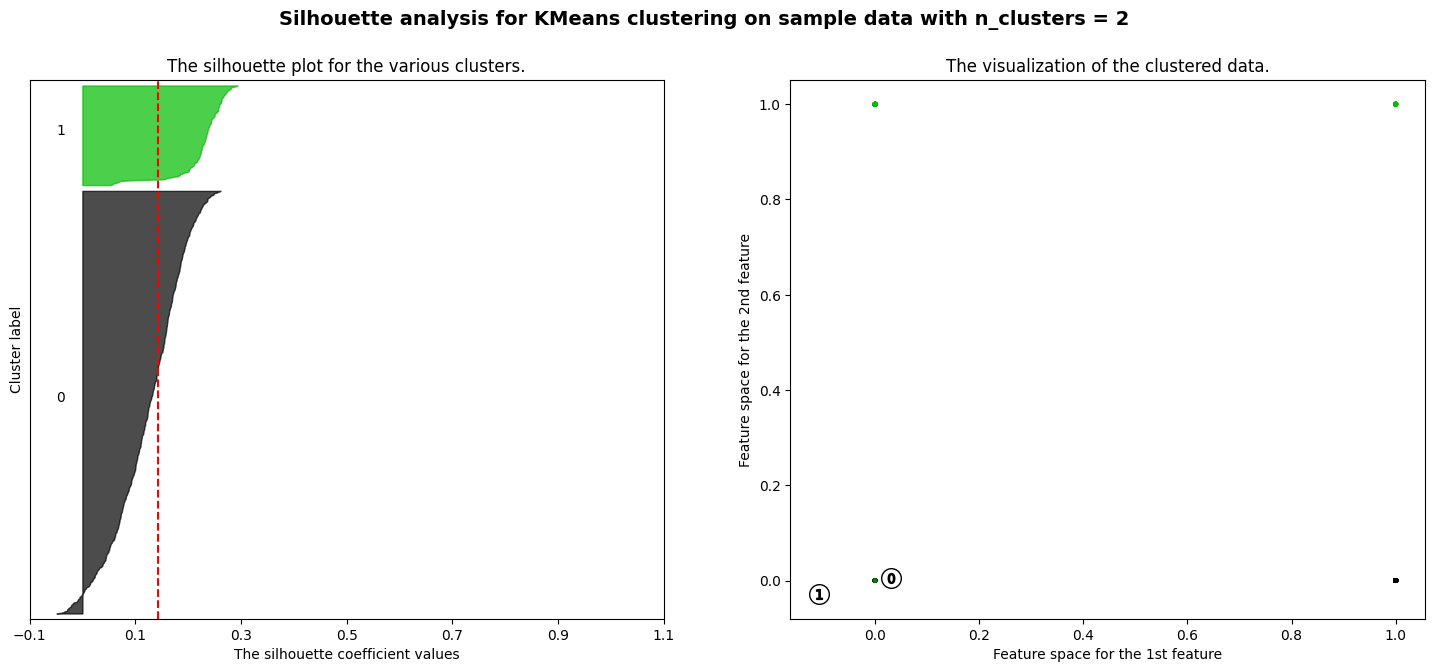

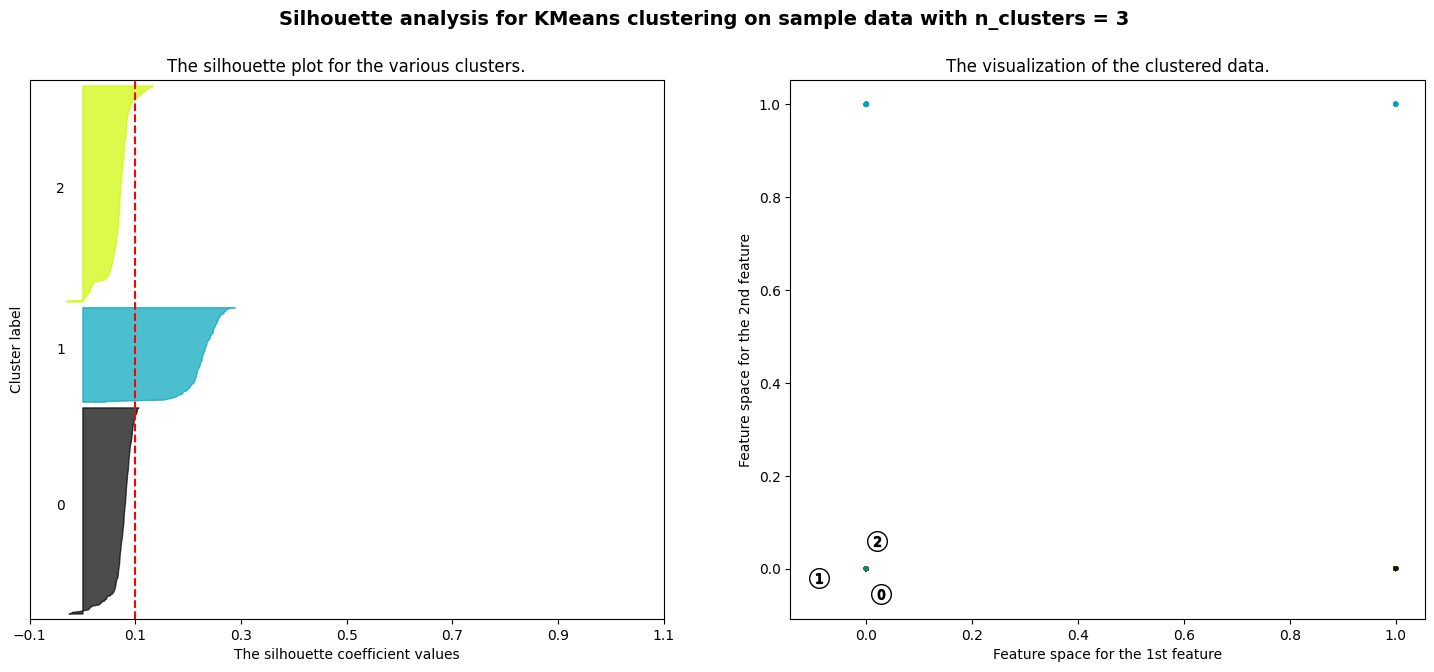

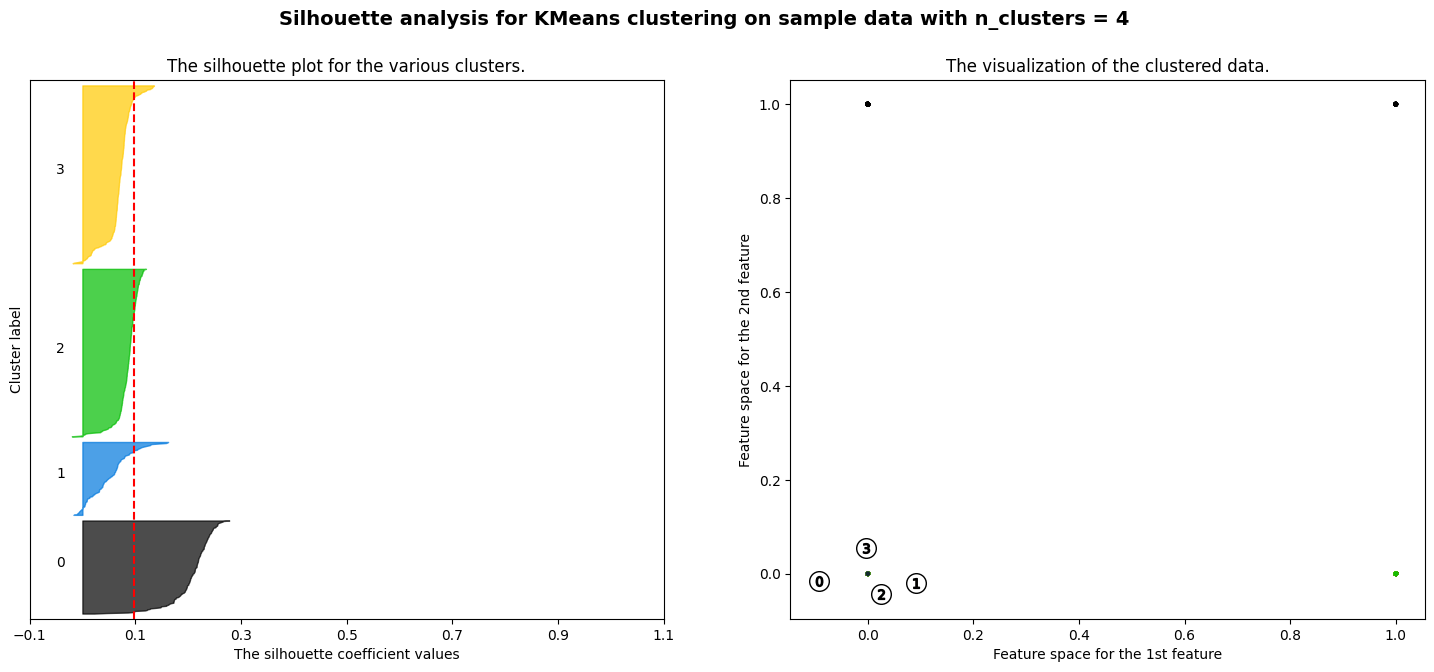

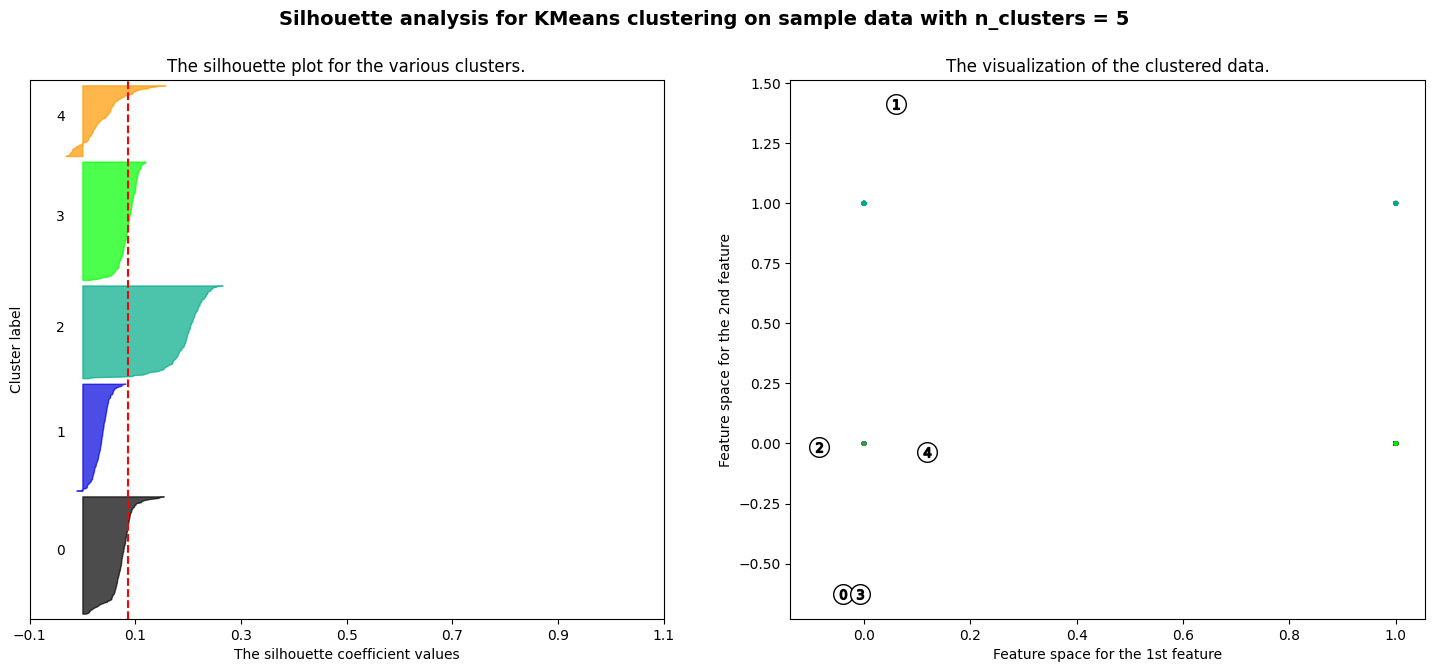

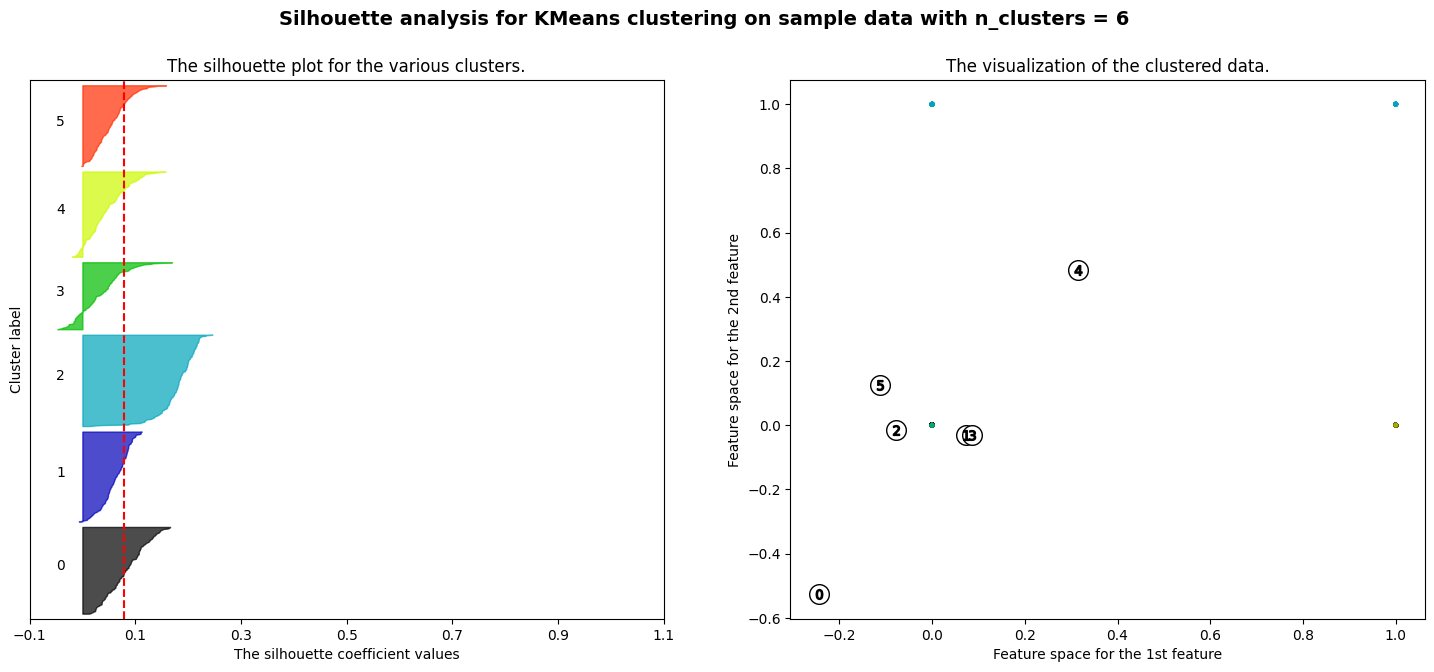

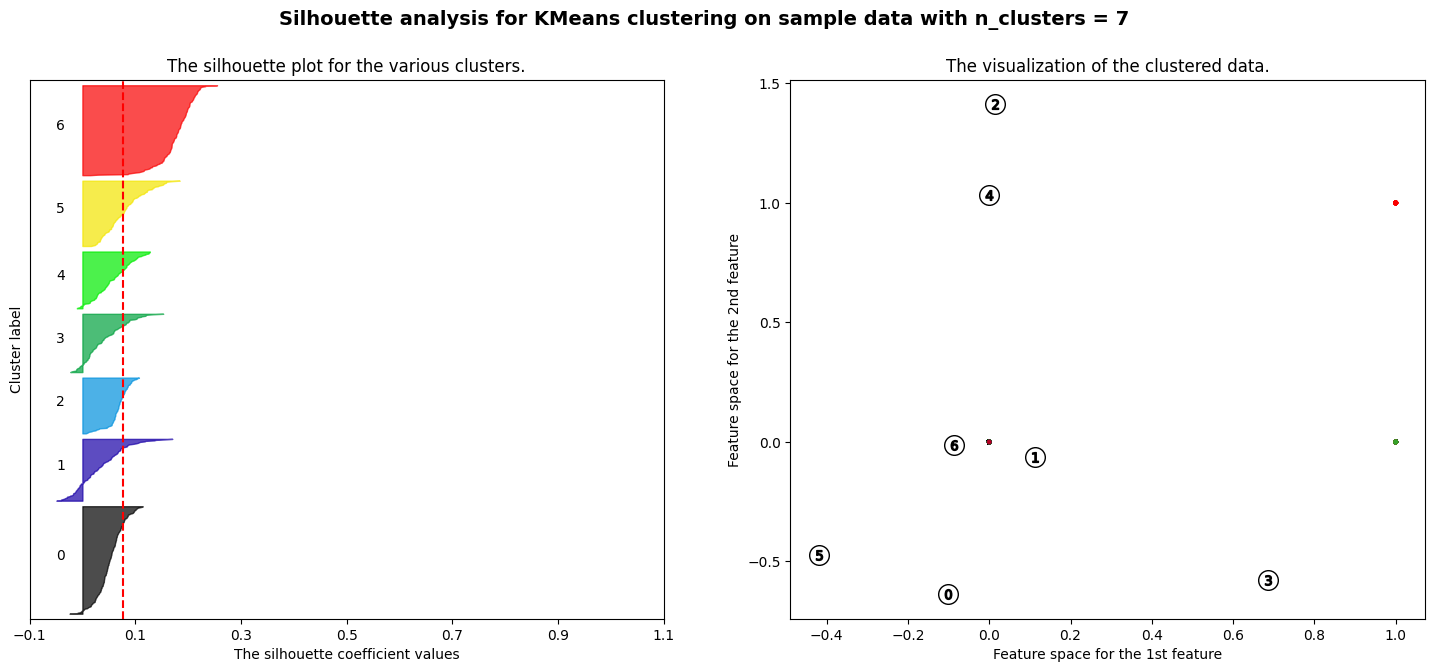

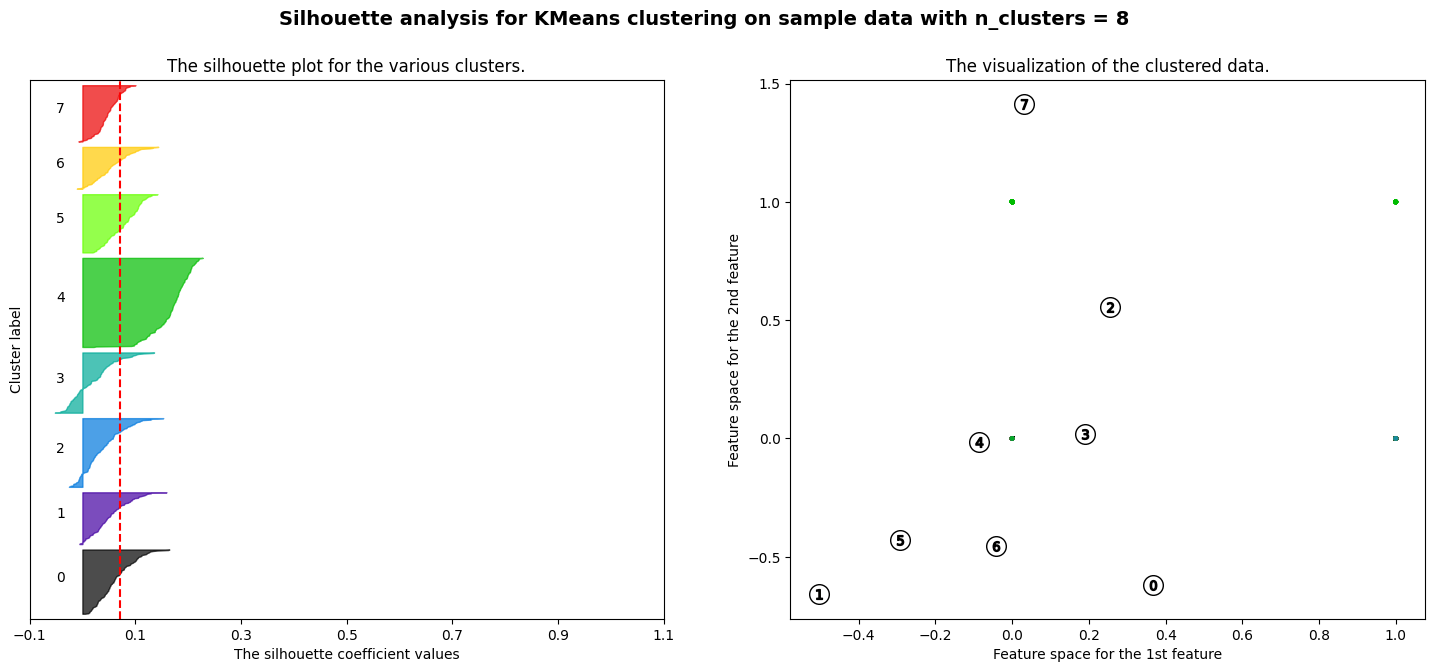

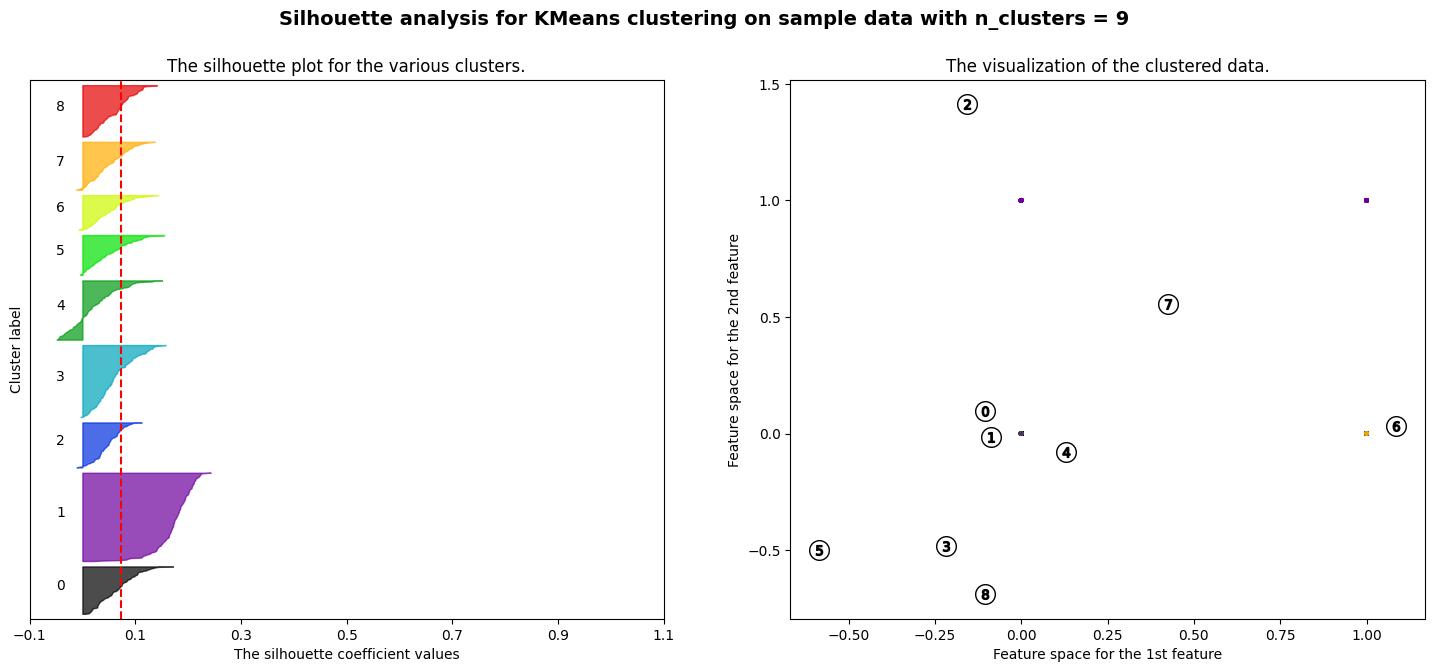

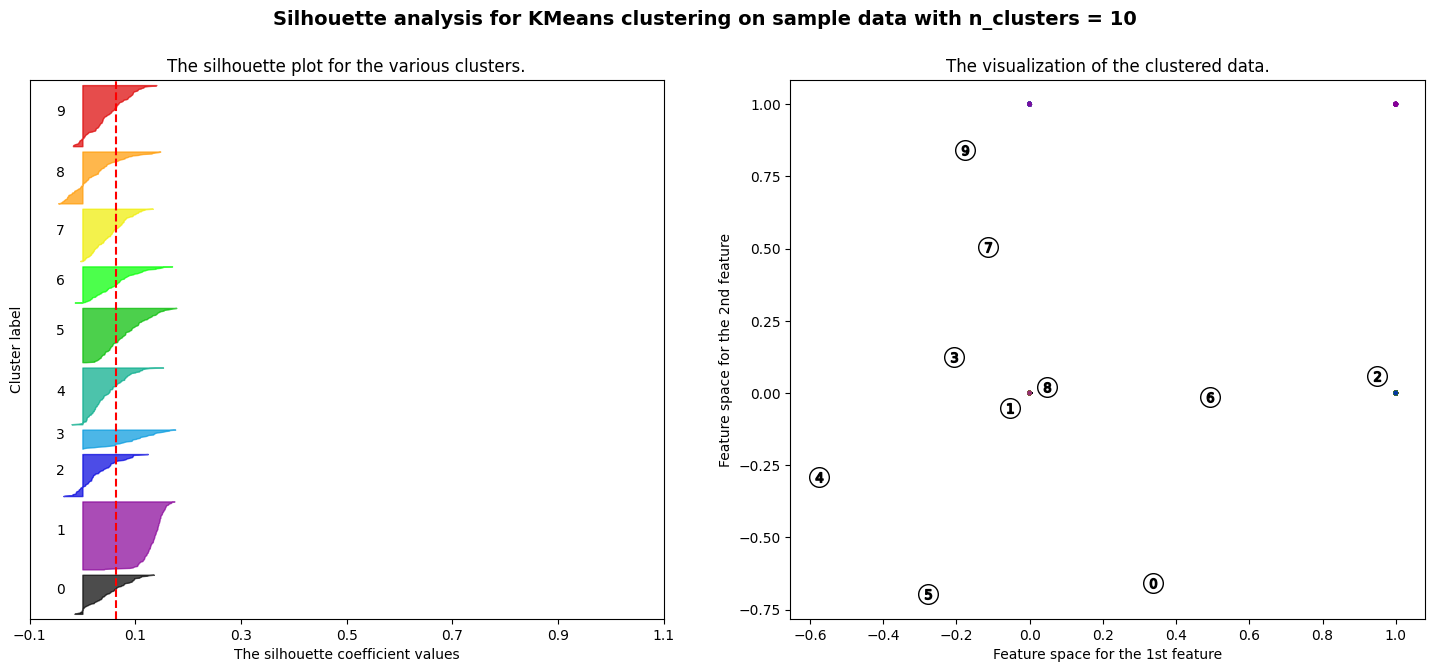

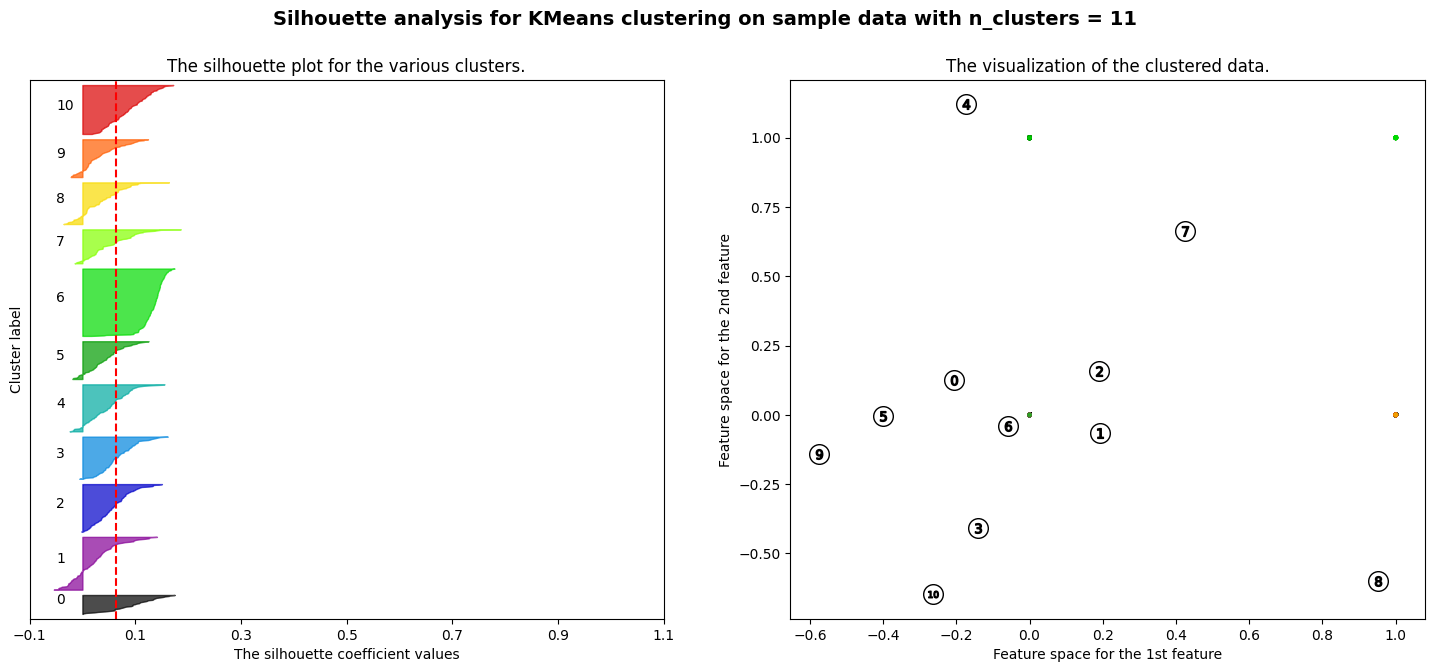

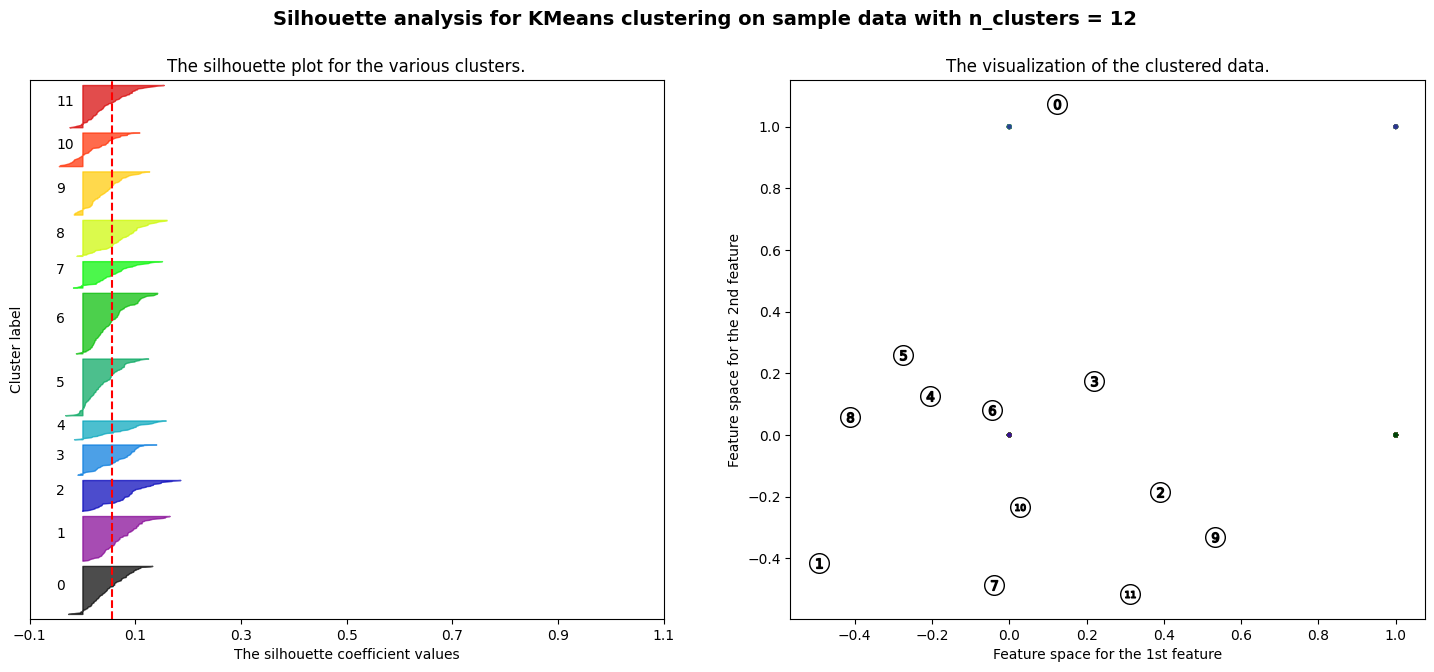

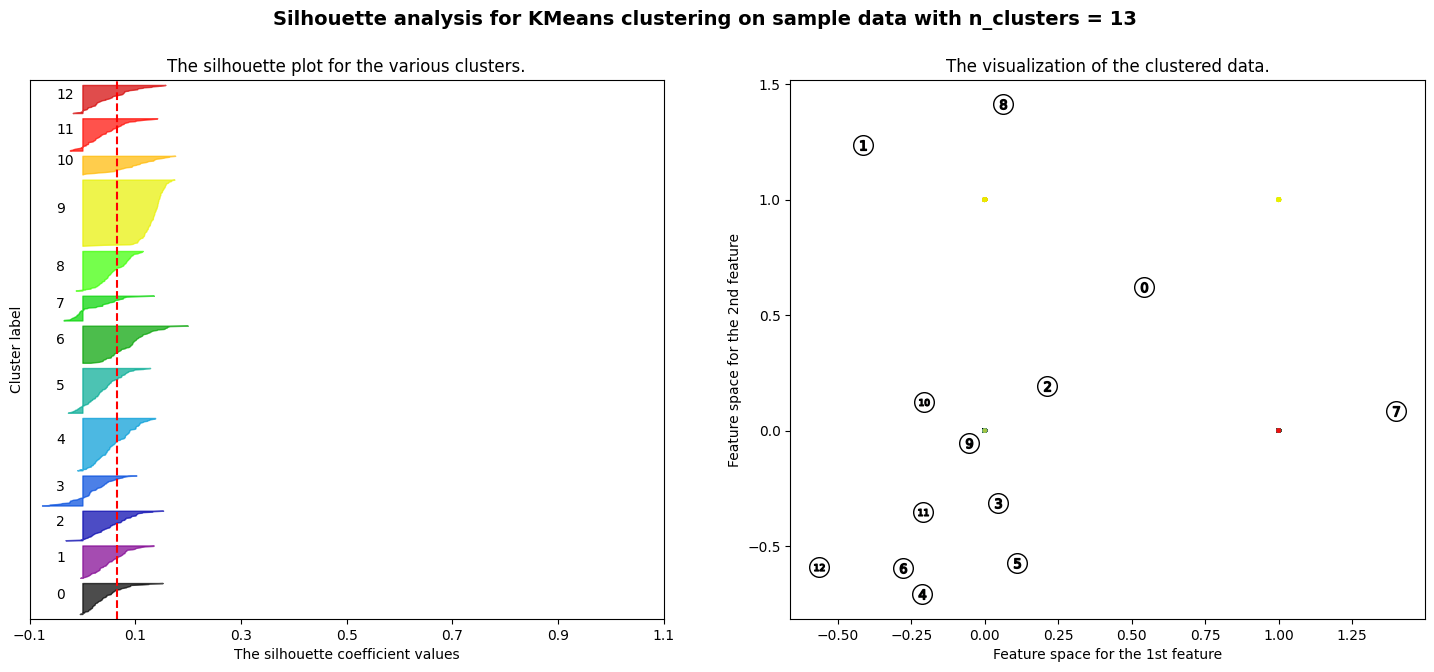

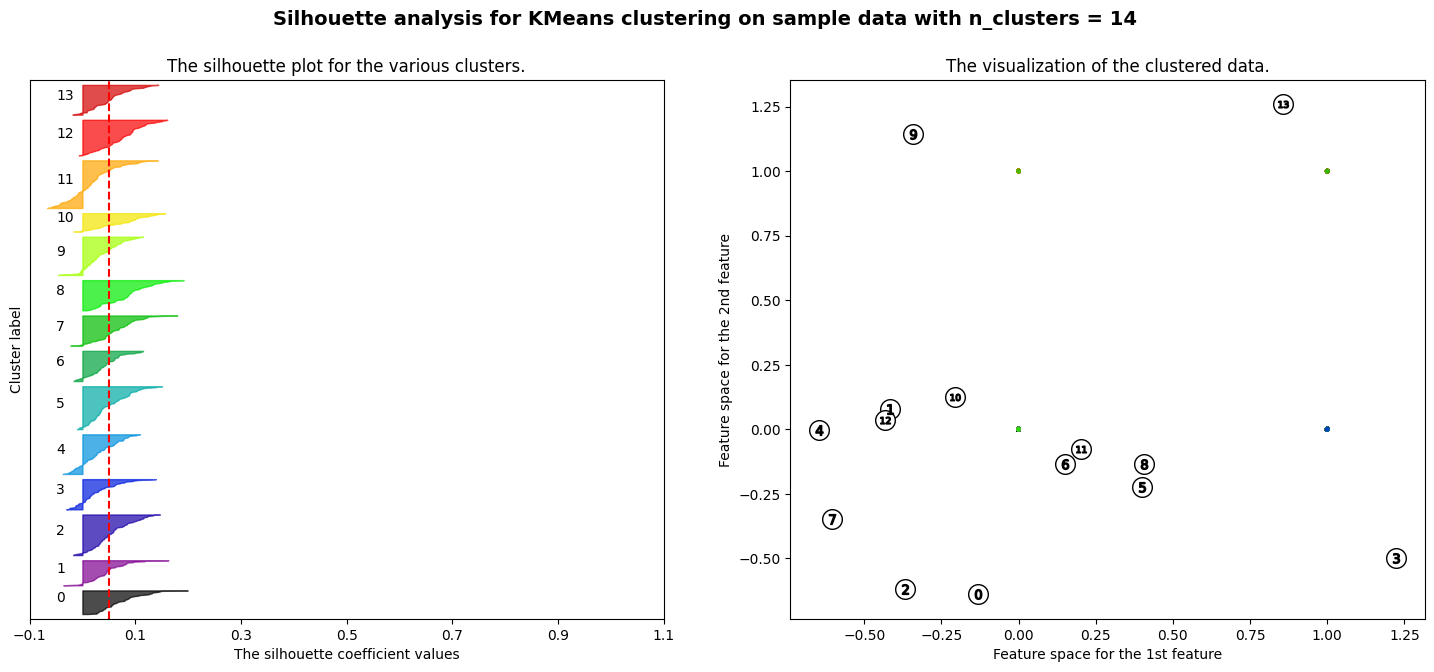

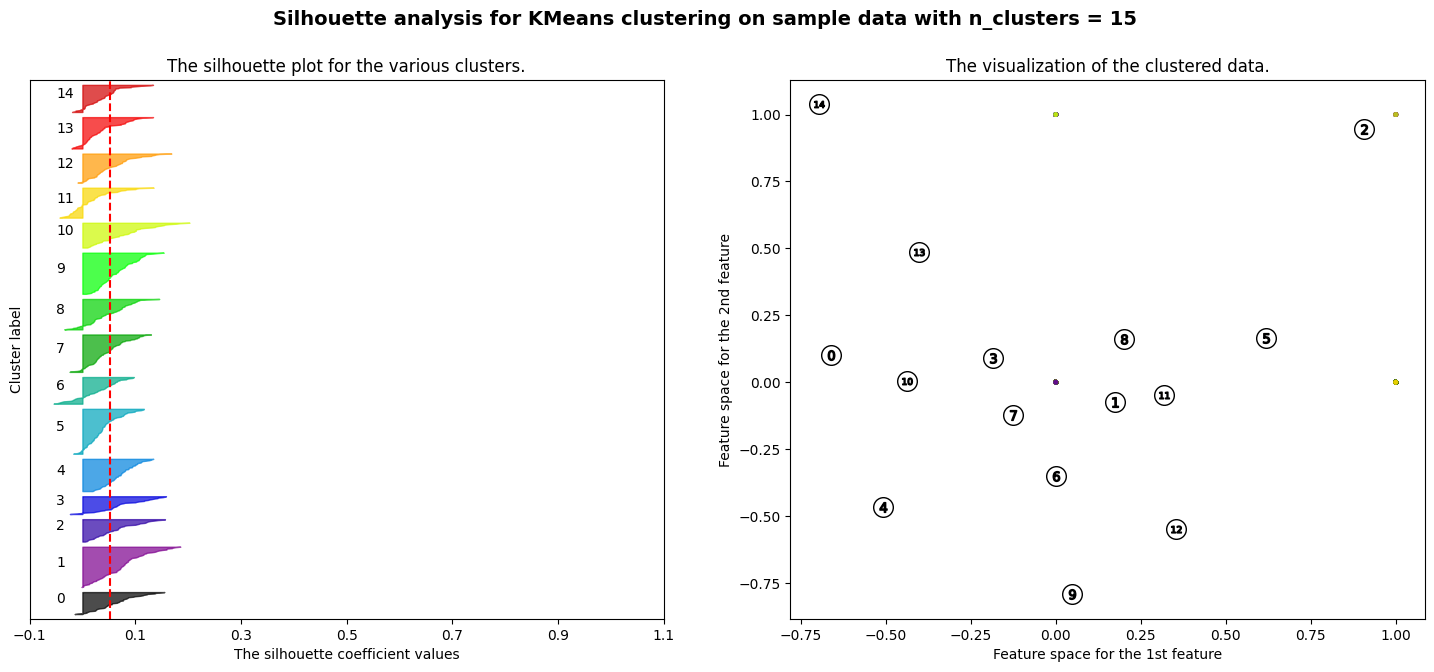

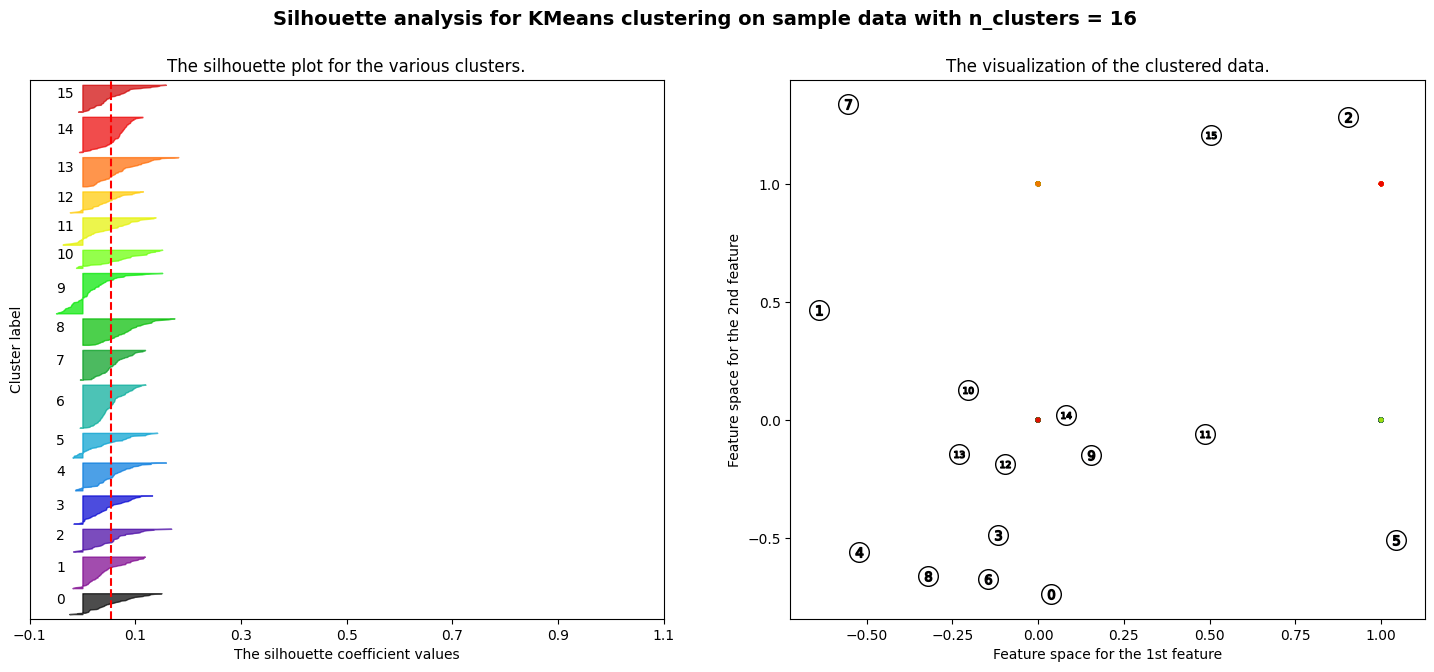

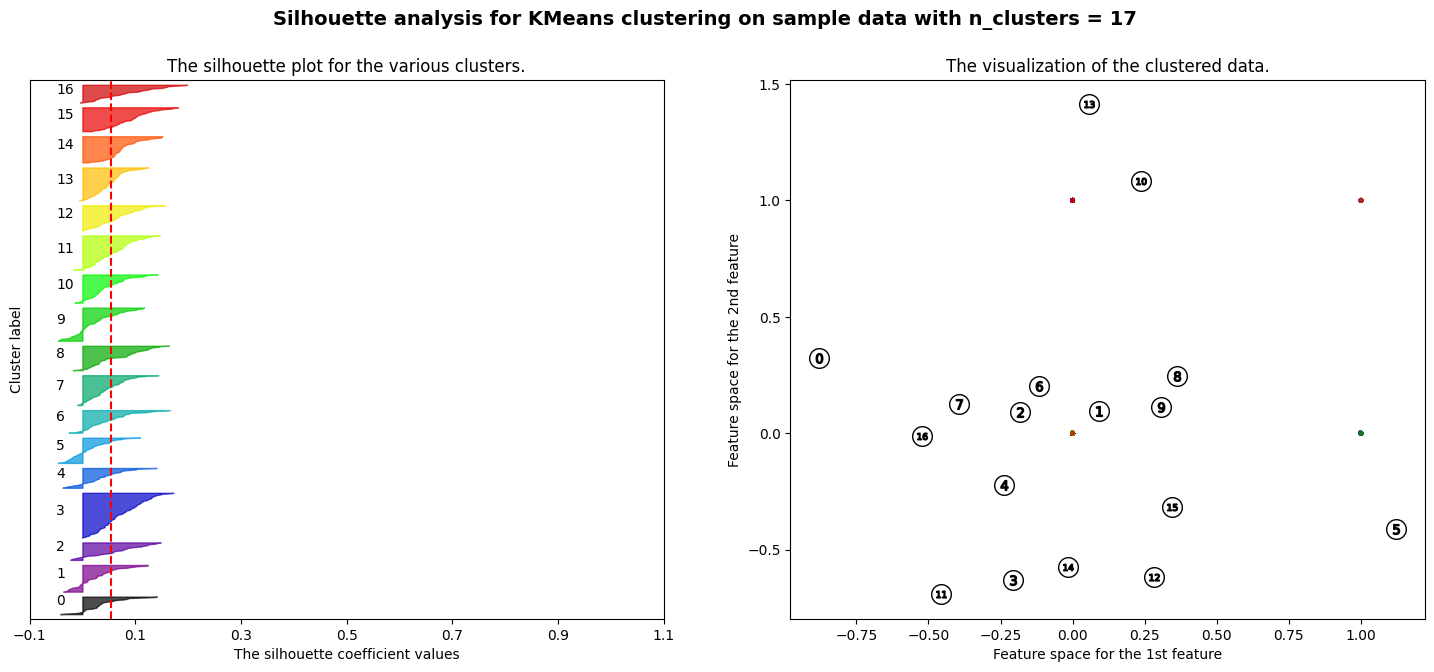

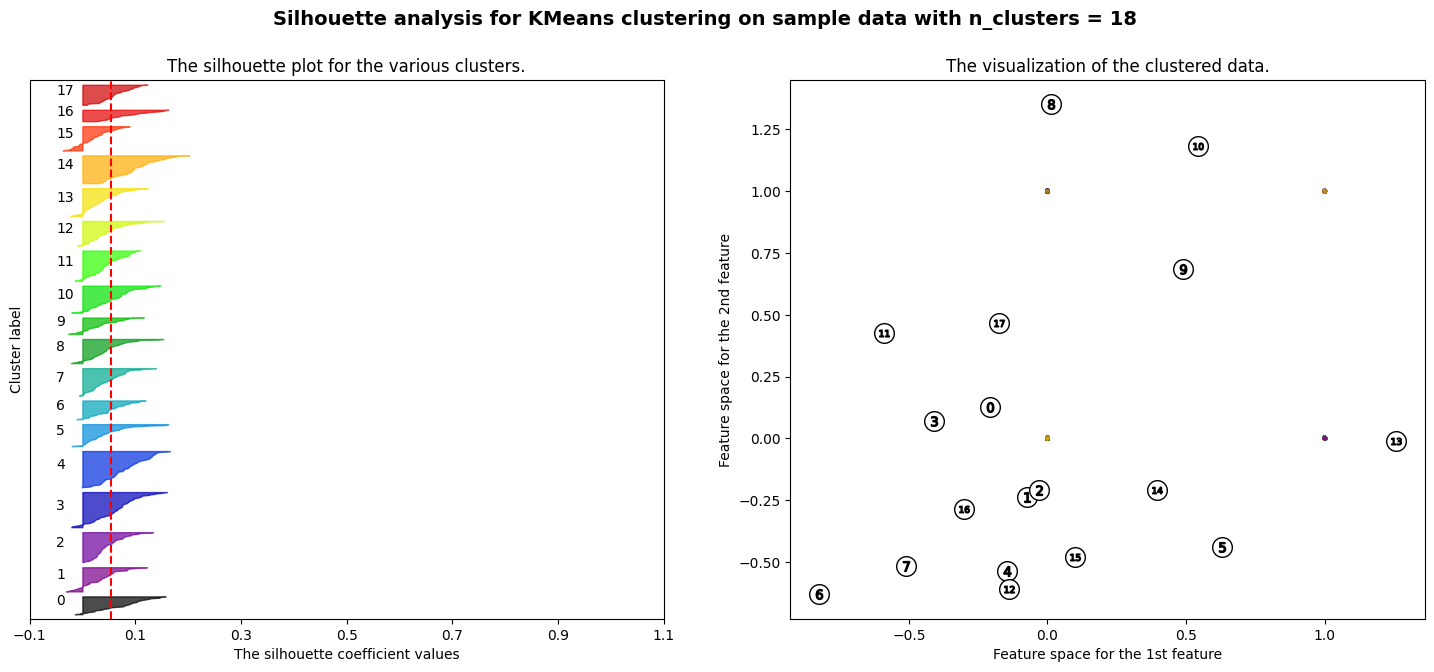

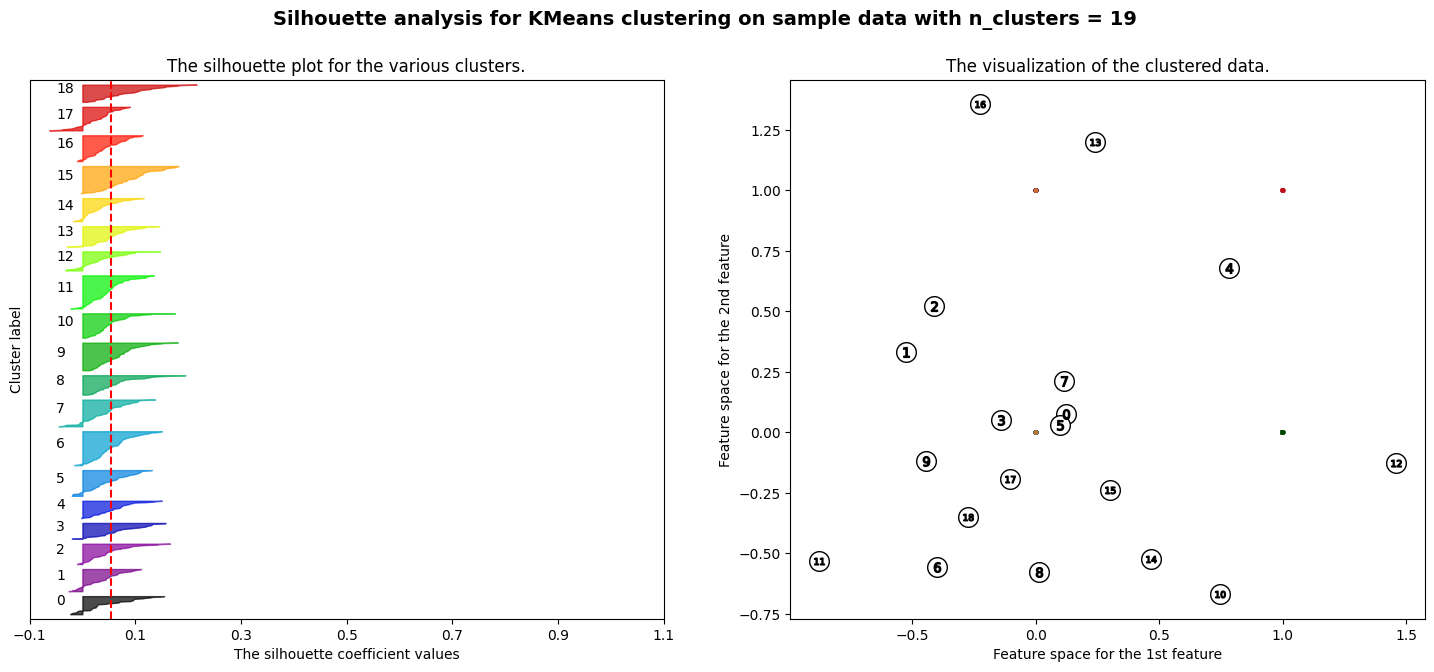

In [ ]:
# Loop over different values of k
for k in k_range:
    # Apply KMeans clustering
    kmeans = KMeans(init="random", n_clusters=k, n_init=20, max_iter=300)
    kmeans.fit(X)

    # Calculate the silhouette score for the current clustering
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [0.5, 1]
    ax1.set_xlim([0.5, 1])
    # The (k+1)*10 is for inserting blank space between silhouette plots of individual clusters,
    # to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (k + 1) * 10])

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, kmeans.labels_)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster i,
        # and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=score, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(kmeans.labels_.astype(float) / k)
    ax2.scatter(X.iloc[:, -2], X.iloc[:, -3], marker='.', s=50, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % k),
                 fontsize=14, fontweight='bold')

plt.show()

Using the elbow method, we could say that the optimal number of clusters is somewhere between 8 and 12 clusters whereas using the average silhouette score, k=2 would be the best fit. We shall go with the average silhouette score method as it indicates better-defined clusters.

         months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
Cluster                                                                         
0                 -0.107100          -0.028744        0.061450      -0.096836   
1                  0.029721           0.005685       -0.013072       0.021857   

         capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
Cluster                                                                        
0            0.070863                 -0.569926                    -0.792856   
1           -0.014251                  0.129924                     0.186222   

         bodily_injuries  witnesses  total_claim_amount  ...  \
Cluster                                                  ...   
0              -0.022344   0.006965           -1.725150  ...   
1               0.002163  -0.001190            0.395281  ...   

         incident_severity_Minor Damage  incident_severity_Total Loss  \
Cluster                 

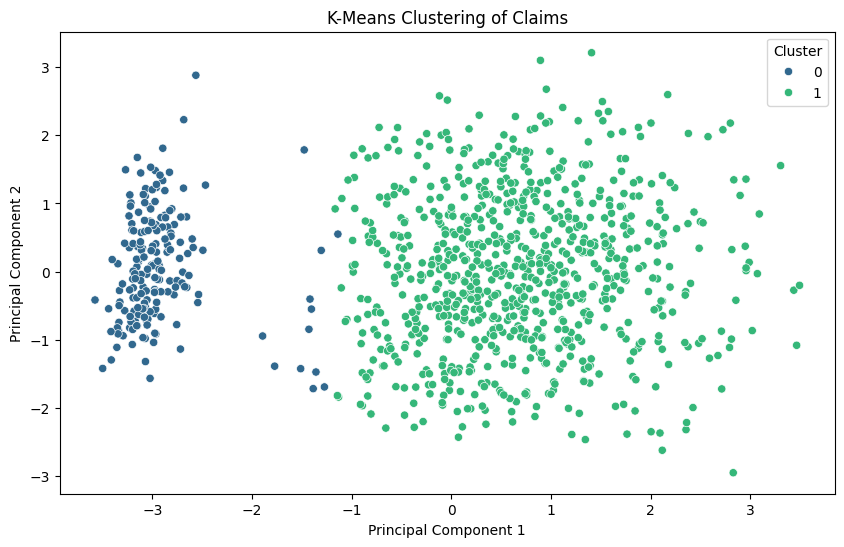

In [ ]:
k = 2
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(X)

# Adding cluster labels to the original DataFrame
Final_claims_data['Cluster'] = kmeans.labels_

# Mean of each feature for each cluster
cluster_summary = Final_claims_data.groupby('Cluster').mean()
print(cluster_summary)

# PCA method
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('K-Means Clustering of Claims')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

With this final graph, we can clearly see and confirm that **k=2** clusters is the best option.

# 6. Conclusion<a name="Conclusion"></a>

In conclusion, we have seen different data science methods/regressions to study and predict either the claim amount or determine whether a claim was fraudulent or not in the 'Auto Insurance Claims Data" dataset from Kaggle.
<br>
After treating the dataset appropriately, we went from regression models such as: Linear, Ridge, Lasso and ElasticNet, to Generalized Linear models and Support Vector Machines before finishing on Clustering Methods, and more particularly the k-means++ method.
<br>
Each method had its particularity and was performant except for regularization methods, Lasso and ElasticNet models, which were not performant at all due to : Lasso forcing some coefficients to zero at the risk of excluding important predictors and ElasticNet for combining the benefits of both approaches to enable coefficient shrinkage and feature selection, especially in datasets with correlated features.